# Imported Library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np

# Source

In [2]:
inactivity_source_path = Path("Resources/500_Cities__No_leisure-time_physical_activity_among_adults_aged___18_years_20240314.csv")
obesity_source_path = Path("Resources/500_Cities__Obesity_among_adults_aged___18_years_20240318.csv")
inactivity_source_data = pd.read_csv(inactivity_source_path)
obesity_source_data = pd.read_csv(obesity_source_path)

# Analysis Code

Filtered and Cleaned Source Data

In [5]:
filtered_inactivity_source_data = inactivity_source_data[["StateDesc", "Data_Value", "PopulationCount"]]
percentage = filtered_inactivity_source_data["Data_Value"]*0.01
inactivity_population = percentage * filtered_inactivity_source_data["PopulationCount"]
inactivity_population = round(inactivity_population)
inactivity_population = inactivity_population.rename("InactivityPopulation")
filtered_inactivity_source_data = pd.concat([filtered_inactivity_source_data, inactivity_population],axis = 1)
filtered_inactivity_source_data = filtered_inactivity_source_data[filtered_inactivity_source_data["Data_Value"].notna()]
calculation_data = filtered_inactivity_source_data.groupby(by = "StateDesc").sum()
percentage = calculation_data["InactivityPopulation"]/calculation_data["PopulationCount"]
state_filtered_inactivity_source_data = percentage.rename("Inactivity_Percentage")

StateDesc
Alabama          0.339465
Alaska           0.210097
Arizona          0.252504
Arkansas         0.323608
California       0.213992
Colorado         0.199164
Connecticut      0.282864
Delaware         0.380634
District of C    0.242150
Florida          0.310213
Georgia          0.318018
Hawaii           0.235579
Idaho            0.222629
Illinois         0.268873
Indiana          0.303140
Iowa             0.263469
Kansas           0.287049
Kentucky         0.319945
Louisiana        0.325206
Maine            0.205900
Maryland         0.315750
Massachusetts    0.272282
Michigan         0.305635
Minnesota        0.246933
Mississippi      0.347130
Missouri         0.293470
Montana          0.245315
Nebraska         0.241255
Nevada           0.277756
New Hampshire    0.266889
New Jersey       0.385349
New Mexico       0.220785
New York         0.301611
North Carolin    0.250355
North Dakota     0.249647
Ohio             0.341936
Oklahoma         0.319837
Oregon           0.200958
Pe

In [6]:
filtered_obesity_source_data = obesity_source_data[["StateDesc", "Data_Value", "PopulationCount"]]
percentage = filtered_obesity_source_data["Data_Value"]*0.01
obesity_population = percentage * filtered_obesity_source_data["PopulationCount"]
obesity_population = round(obesity_population)
obesity_population = obesity_population.rename("ObesityPopulation")
filtered_obesity_source_data = pd.concat([filtered_obesity_source_data, obesity_population],axis = 1)
filtered_obesity_source_data = filtered_obesity_source_data[filtered_obesity_source_data["Data_Value"].notna()]
calculation_data = filtered_obesity_source_data.groupby(by = "StateDesc").sum()
percentage = calculation_data["ObesityPopulation"]/calculation_data["PopulationCount"]
state_filtered_obesity_source_data = percentage.rename("Obesity_Percentage")

StateDesc
Alabama          0.376937
Alaska           0.341658
Arizona          0.294218
Arkansas         0.331304
California       0.247809
Colorado         0.233509
Connecticut      0.303431
Delaware         0.395835
District of C    0.261168
Florida          0.302949
Georgia          0.332166
Hawaii           0.236183
Idaho            0.296094
Illinois         0.325860
Indiana          0.354205
Iowa             0.362659
Kansas           0.328440
Kentucky         0.332305
Louisiana        0.367251
Maine            0.237509
Maryland         0.391793
Massachusetts    0.280041
Michigan         0.360863
Minnesota        0.270127
Mississippi      0.381227
Missouri         0.336808
Montana          0.250683
Nebraska         0.324861
Nevada           0.269268
New Hampshire    0.304990
New Jersey       0.336746
New Mexico       0.265388
New York         0.256275
North Carolin    0.320807
North Dakota     0.303202
Ohio             0.383708
Oklahoma         0.345916
Oregon           0.269139
Pe

In [15]:
state_inactivity_obesity_source_data = pd.merge(state_filtered_obesity_source_data, state_filtered_inactivity_source_data,how = "inner", on = ["StateDesc"])
state_inactivity_obesity_source_data = state_inactivity_obesity_source_data.drop(index = ["United States","District of C"])
state_inactivity_obesity_source_data_sorted_by_inactivity = state_inactivity_obesity_source_data.sort_values(by = ["Inactivity_Percentage"], ascending = False)
state_inactivity_obesity_source_data_sorted_by_obesity = state_inactivity_obesity_source_data.sort_values(by = ["Obesity_Percentage"], ascending = False)
state_inactivity_obesity_source_data.to_csv("state_inactivity_obesity_source_data.csv")
state_inactivity_obesity_source_data

,Obesity_Percentage,Inactivity_Percentage
StateDesc,,
Alabama,0.376937,0.339465
Alaska,0.341658,0.210097
Arizona,0.294218,0.252504
Arkansas,0.331304,0.323608
California,0.247809,0.213992
Colorado,0.233509,0.199164
Connecticut,0.303431,0.282864
Delaware,0.395835,0.380634
Florida,0.302949,0.310213


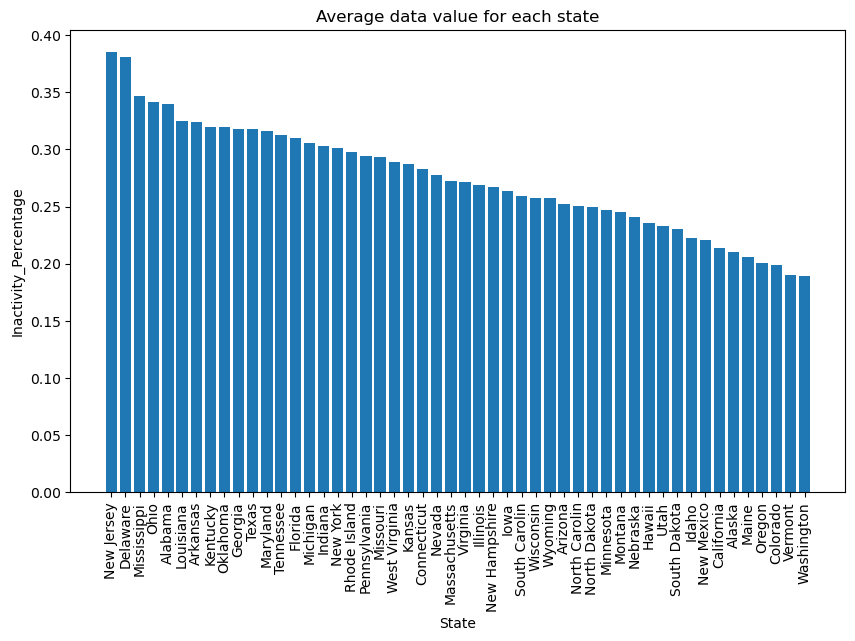

In [12]:
plt.figure(figsize=(10, 6))
plt.bar(state_inactivity_obesity_source_data_sorted_by_inactivity.index, state_inactivity_obesity_source_data_sorted_by_inactivity['Inactivity_Percentage'])
plt.xticks(fontsize = 10, rotation = "vertical")
plt.ylabel("Inactivity_Percentage")
plt.xlabel("State")
plt.title("Average data value for each state")
plt.show()

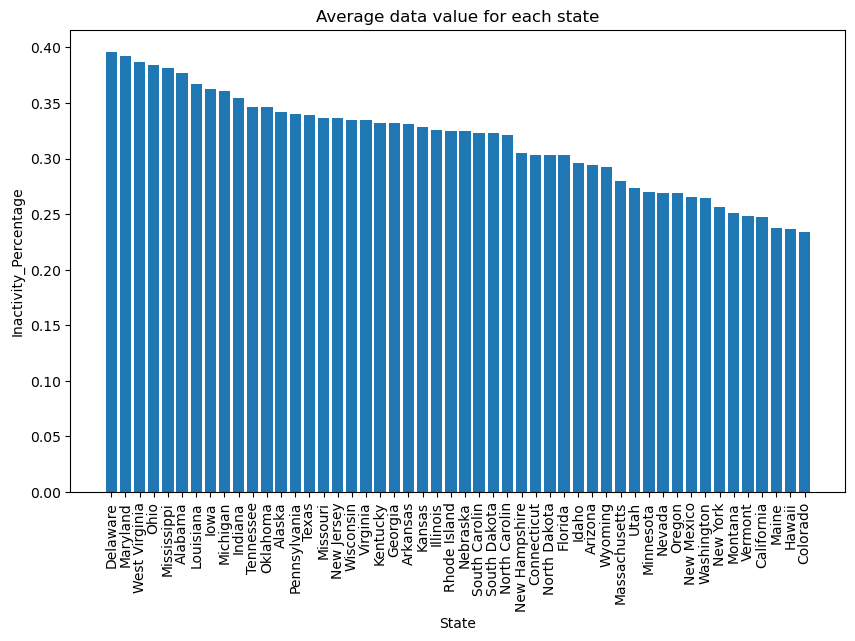

In [13]:
plt.figure(figsize=(10, 6))
plt.bar(state_inactivity_obesity_source_data_sorted_by_obesity.index, state_inactivity_obesity_source_data_sorted_by_obesity['Obesity_Percentage'])
plt.xticks(fontsize = 10, rotation = "vertical")
plt.ylabel("Inactivity_Percentage")
plt.xlabel("State")
plt.title("Average data value for each state")
plt.show()

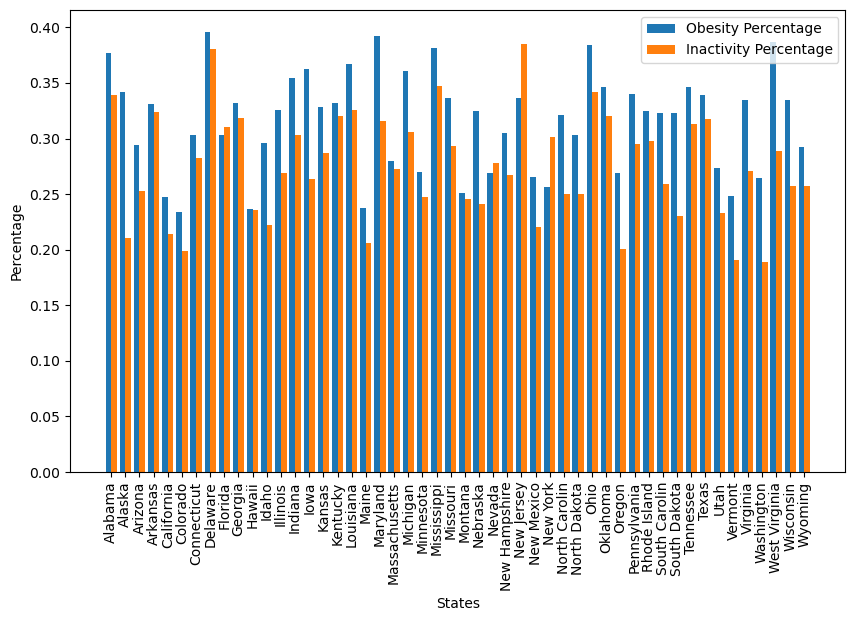

In [14]:
x_label = state_inactivity_obesity_source_data.index
obesity_data = state_inactivity_obesity_source_data["Obesity_Percentage"]
inactivity_data = state_inactivity_obesity_source_data["Inactivity_Percentage"]
x_axis = np.arange(len(x_label))
plt.figure(figsize=(10, 6))
plt.bar(x_axis-0.2, obesity_data, 0.4, label = "Obesity Percentage")
plt.bar(x_axis+0.2, inactivity_data, 0.4, label = "Inactivity Percentage")
plt.xticks(x_axis, x_label, rotation = 90)
plt.xlabel("States")
plt.ylabel("Percentage")
plt.legend()
plt.show()